In [1]:
# using SVR to do the prediction

In [2]:
# to change the data into the right format
def transform_series(series,window_size):
    # containers for input/output pairs
    X = []
    y = []
    #print(len(series))
    for i in range(len(series)-window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    # reshape each 
    
    X = np.asarray(X)
    X.shape = (np.shape(X)[0:2])
    y = np.asarray(y)
    y.shape = (len(y),1)
    return X,y

In [3]:
# normalise the data that will be used to train the model
from pandas import Series
import numpy as np
import pandas as pd
series = Series.from_csv('N_cur_2017_01_05.csv', header=0)
series = pd.to_numeric(series,errors='coerce')
series = series.dropna(axis=0)
window_size = 7
series = series.tolist()
mean_series = np.mean(series)
series = (series-mean_series)/mean_series

X,y = transform_series(series = series,window_size = window_size)

In [4]:
# to divide the dataset into training set and test set
train_test_split = int(np.ceil(2*len(y)/float(3)))   # set the split point, np.ceil: Return the ceiling of the input, element-wise.

# 2/3 of the whole dataset is training set
X_train = X[:train_test_split,:]
y_train = y[:train_test_split]

# 1/3 of the whole dataset is test set
X_test = X[train_test_split:,:]
y_test = y[train_test_split:]

In [5]:
# to train the data modeling using SVR
from sklearn.svm import SVR
import numpy as np

np.random.seed(0)
y = y_train
X = X_train
#y = column_or_1d(y, warn=True)
clf = SVR(kernel='linear', C=10, epsilon=0.001)
clf.fit(X, y) 

F:\anaconda\envs\individual-project\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

The score of the root-mean-square-error
0.19448159541449977


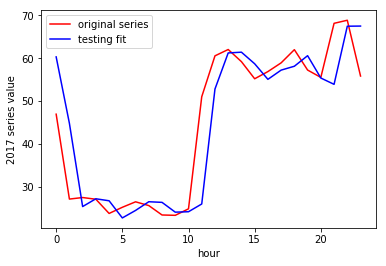

In [6]:
# to show the prediction results using graph(testing)
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

# plot original series
plt.plot(series[-24:]*mean_series+mean_series,color = 'r', label='Original')
test_predict = clf.predict(X_test)
print("The score of the root-mean-square-error")
print (sqrt(mean_squared_error(y_test, test_predict)))

# plot testing set prediction
plt.plot(np.arange(0,24,1),test_predict[-24:]*mean_series+mean_series,color = 'b', label='Predict')

# pretty up graph
plt.xlabel('hour')
plt.ylabel('2017 series value')
plt.legend(['original series','testing fit','training fit'],loc='best')
plt.show()

The score of the root-mean-square-error
0.19688039230906426


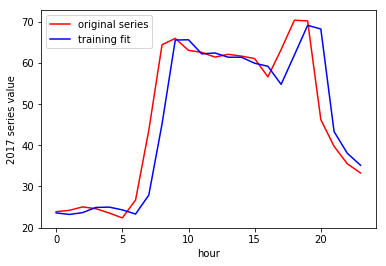

In [7]:
# to show the prediction results using graph(training)
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

# plot original series
plt.plot(y_train[-24:]*mean_series+mean_series,color = 'r', label='Original')
train_predict = clf.predict(X_train)
print("The score of the root-mean-square-error")
print (sqrt(mean_squared_error(y_train, train_predict)))

plt.plot(np.arange(0,24,1),train_predict[-24:]*mean_series+mean_series,color = 'b', label='Predict')

# pretty up graph
plt.xlabel('hour')
plt.ylabel('2017 series value')
plt.legend(['original series','training fit','testing fit'],loc='best')
plt.show()

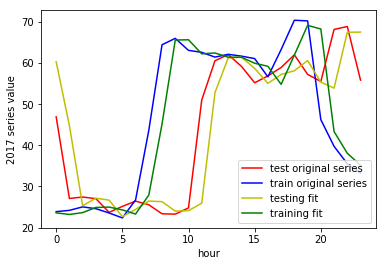

In [8]:
# to show the prediction results using graph(testing and training)
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from math import sqrt
%matplotlib inline

# plot original series
plt.plot(y_test[-24:]*mean_series+mean_series,color = 'r', label='Original')
plt.plot(y_train[-24:]*mean_series+mean_series,color = 'b', label='Original')
#plt.plot(series[-24:]*mean_series+mean_series,color = 'g', label='Original')
# plot testing set prediction
plt.plot(np.arange(0,24,1),test_predict[-24:]*mean_series+mean_series,color = 'y', label='Predict')
# plot testing set prediction
plt.plot(np.arange(0,24,1),train_predict[-24:]*mean_series+mean_series,color = 'g', label='Predict')

# pretty up graph
plt.xlabel('hour')
plt.ylabel('2017 series value')
plt.legend(['test original series','train original series','testing fit','training fit'],loc='best')
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

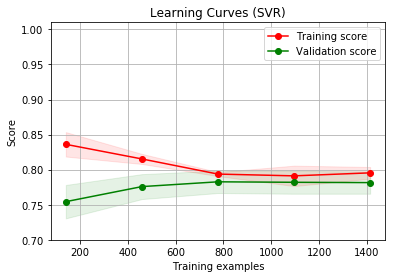

In [10]:
from sklearn.svm import SVR
title = "Learning Curves (SVR)"

cv = ShuffleSplit(n_splits=2, test_size=1/3, random_state=0)

estimator = SVR()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()